<a href="https://colab.research.google.com/github/amoses-a/binary_classification_breast_cancer_ML/blob/main/Breast_Cancer_Dataset_End_to_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Worked Example: Benign/Malignant Breast Cancer Tumor
We will see a worked example using the [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) dataset. It is provided to you in .csv form


Following the known machine learning pipeline:
- Define the Problem
- Identify the type of Problem
  * Supervised or Unsupervised
  * Classification, Regression, Clustering, other
- Data Collection
- Exploratory data analysis
- Split: Training / Testing sets
- Data cleaning and preprocessing
- Feature scaling, selection, engineering, extraction
- Select: Machine Learning model
- Select: Evaluation metrics
- Train and Evaluate

In [ ]:
# Import libraries here:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#... import any other libraries/modules on this code block

# 1. Exploratory Data Analysis

In [ ]:
# Task: Load the dataset, see the basic statistics and characterize it based on balance/imbalance
breast_cancer_df = pd.read_csv("breast_cancer_data.csv")
breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Task: Print the feature column names and the target column name (drop the Unnamed: 32 column first since it's redundant.)
breast_cancer_df.drop(columns=['id','Unnamed: 32'],inplace=True)
column_names = breast_cancer_df.columns.tolist()

print(f"Feature names: {column_names[1:]}")
print(f"Target name: {column_names[0]}")

Feature names: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Target name: diagnosis


In [ ]:
# Task: Map the "diagnosis" column values into 0 for benign and 1 for malignant tumors
breast_cancer_df['diagnosis']= breast_cancer_df['diagnosis'].map({"M":1,"B":0})

In [ ]:
breast_cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    357
1    212
Name: diagnosis, dtype: int64


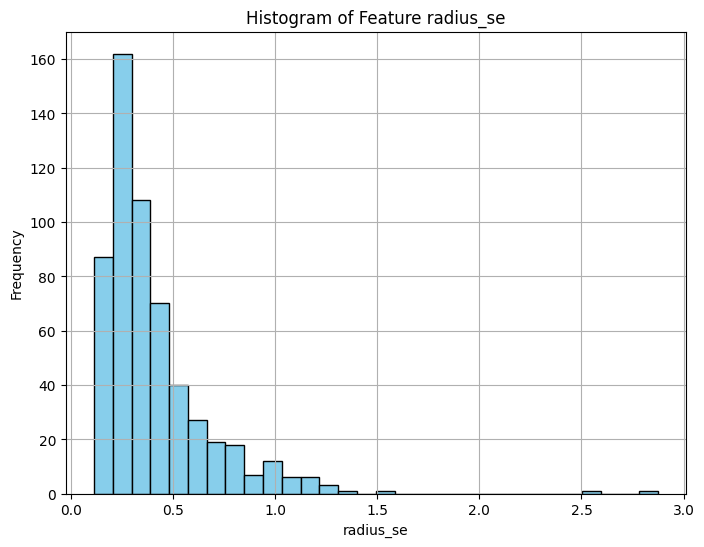

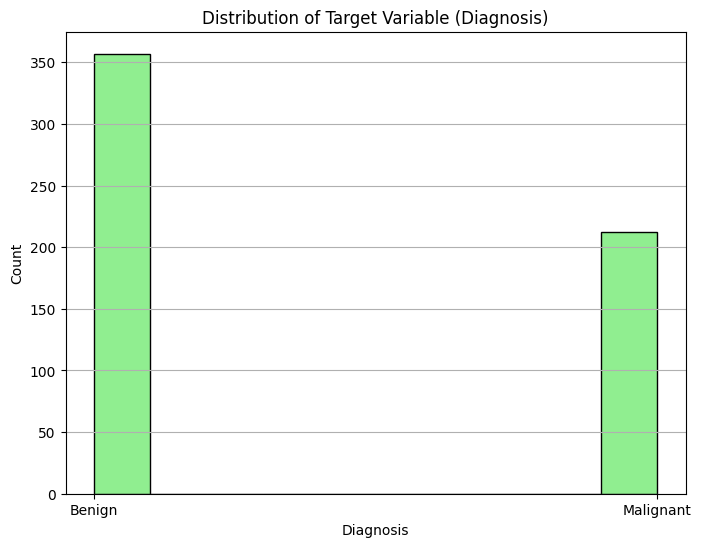

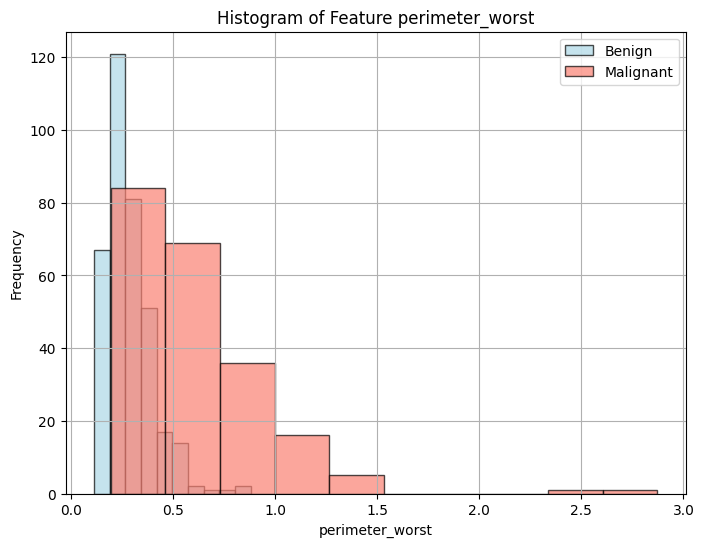

In [ ]:
print(breast_cancer_df['diagnosis'].value_counts())
# Task: Create the following visualizations:
# Histogram of feature radius_se
plt.figure(figsize=(8, 6))
plt.hist(breast_cancer_df['radius_se'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Feature radius_se')
plt.xlabel('radius_se')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 6))
plt.hist(breast_cancer_df['diagnosis'], color='lightgreen', edgecolor='black')
plt.title('Distribution of Target Variable (Diagnosis)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.grid(True, axis='y')
plt.show()

# Two histograms of feature perimeter_worst: one for benign tumors and one for malignant tumors
benign_data = breast_cancer_df[breast_cancer_df['diagnosis'] == 0]['radius_se']
malignant_data = breast_cancer_df[breast_cancer_df['diagnosis'] == 1]['radius_se']

plt.figure(figsize=(8, 6))
plt.hist(benign_data, color='lightblue',edgecolor='black', alpha=0.7, label='Benign')
plt.hist(malignant_data, color='salmon',edgecolor='black', alpha=0.7, label='Malignant')
plt.title('Histogram of Feature perimeter_worst')
plt.xlabel('perimeter_worst')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 2. Split into training and test sets, Data Cleaning and Preprocessing



In [ ]:
#Task: Check for NaNs
missing_values = breast_cancer_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Task: Split the dataframe into training and testing sets
# Test set shall be 20 % of the total dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target variable
X = breast_cancer_df.drop('diagnosis', axis=1)
y = breast_cancer_df['diagnosis']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Print the shapes of X_train, X_test, y_train and y_test
print(f"X train: {X_train.shape}\nY train:{y_train.shape}\nX test: {X_test.shape}\nY test: {y_test.shape}")

X train: (455, 30)
Y train:(455,)
X test: (114, 30)
Y test: (114,)


# 3. Features

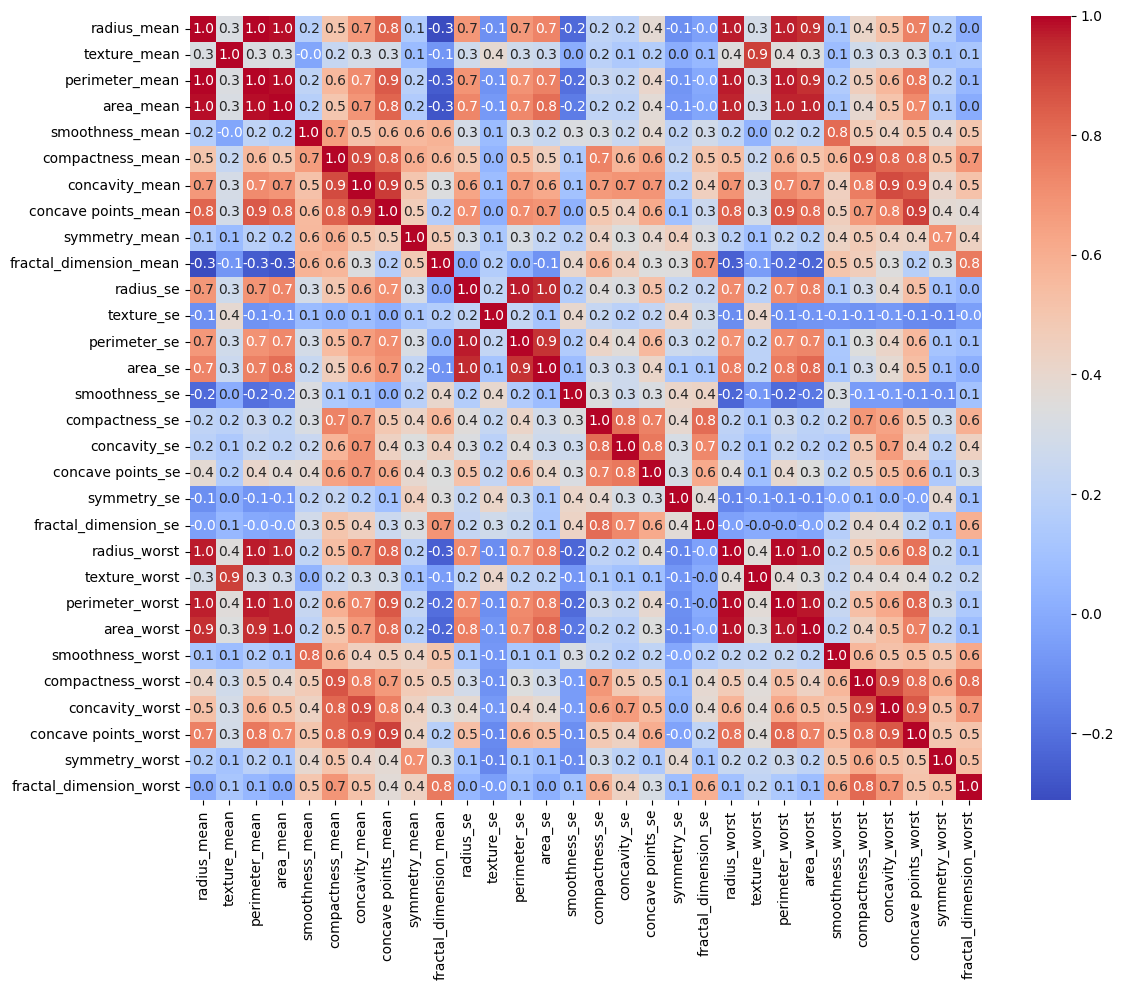

In [ ]:
# Task 3: Plot a heatmap of the correlations of the dataframe features
correlations = X.corr()

plt.figure(figsize=[12, 10])
sns.heatmap(correlations, annot=True , fmt = '.1f', cmap='coolwarm')
plt.tight_layout()
plt.show()

# 4. Machine Learning Model


In [ ]:
# Task: Define four models:
# 1. An SVM model with rbf kernel
# 2. A Random Forest model with max depth = 10 and gini impurity criterion
# 3. A Multi-Layer Perceptron with the default parameters
# 4. A Logistic Regression model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

svm_clf = SVC(kernel='rbf', random_state =42)
rf_clf = RandomForestClassifier(criterion='gini', max_depth=10, random_state =42)
mlp_clf = MLPClassifier(random_state =42)
lr_clf = LogisticRegression(random_state =42)

# 5. Train the model! Then, evaluate on the test set using appropriate metrics

------------------------
SVC
------------------------


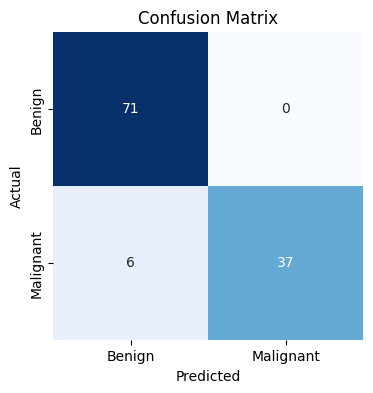

Accuracy: 0.9474
Precision: 1.0000
Recall: 0.8605
F1 Score: 0.9250
Sensitivity: 0.8605
Specificity: 1.0000
------------------------
RandomForestClassifier
------------------------


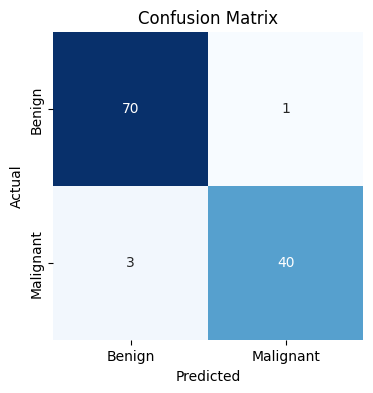

Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
Sensitivity: 0.9302
Specificity: 0.9859
------------------------
MLPClassifier
------------------------


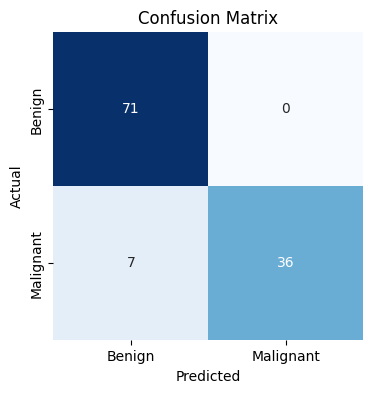

Accuracy: 0.9386
Precision: 1.0000
Recall: 0.8372
F1 Score: 0.9114
Sensitivity: 0.8372
Specificity: 1.0000
------------------------
LogisticRegression
------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


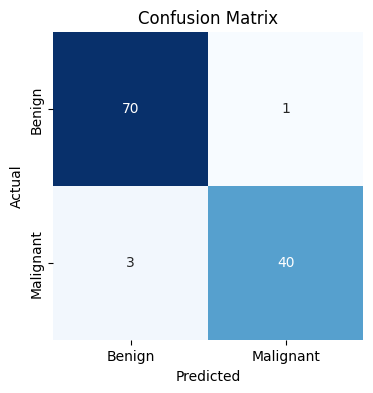

Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
Sensitivity: 0.9302
Specificity: 0.9859


In [ ]:
# Task : Train each model, evaluate on the test set and print the metrics'values for each model.
# (accuracy, precision, recall, f1 score, specificity, sensitivity)
# Also, plot the corresponding confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

models = [svm_clf, rf_clf, mlp_clf, lr_clf]

def sensitivity_score(conf_matrix):
  # Extracting values from confusion matrix

  tn = conf_matrix[0][0]
  fp = conf_matrix[0][1]
  fn = conf_matrix[1][0]
  tp = conf_matrix[1][1]
  #Calculating sensitivity
  return tp / (tp + fn)

def specificity_score(conf_matrix):
  # Extracting values from confusion matrix

  tn = conf_matrix[0][0]
  fp = conf_matrix[0][1]
  fn = conf_matrix[1][0]
  tp = conf_matrix[1][1]

  # Calculating specificity
  return tn / (tn + fp)


for model in models:
  print("------------------------")
  print(model.__class__.__name__)
  print("------------------------")
  # Train on the training set
  model.fit(X_train, y_train)
  # Make predictions on the test set
  y_pred = model.predict(X_test)
  # Assuming y_true contains true labels and y_pred contains predicted labels
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred) #precision = tp/tp +fp
  recall = recall_score(y_test, y_pred) # recall = tn / tn + fp
  f1 = f1_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  sensitivity = sensitivity_score(conf_matrix)
  specificity = specificity_score(conf_matrix)

  # Plot the confusion matrix using seaborn heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Benign', 'Malignant'],
              yticklabels=['Benign', 'Malignant'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

  # Print the metrics
  print(f'Accuracy: {accuracy:.4f}')
  print(f'Precision: {precision:.4f}')
  print(f'Recall: {recall:.4f}')
  print(f'F1 Score: {f1:.4f}')
  print(f'Sensitivity: {sensitivity:.4f}')
  print(f'Specificity: {specificity:.4f}')

# 6. Results Evaluation and Discussion

In [ ]:
# EXTRA: Keep the subset of "mean" features and evaluate the model performance
# using only those features. How can you improve performance?
# Use random forest as a model
# EXTRA: Keep the subset of "mean" features and evaluate the model performance
# using only those features. How can you improve performance?
column_names = ["radius_mean", "texture_mean", "perimeter_mean",
                "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
                "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]

# Split the data into features and target
X_subset = X[column_names]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

model = rf_clf
print("------------------------")
print(model.__class__.__name__)
print("------------------------")
# Train on the training set
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Assuming y_true contains true labels and y_pred contains predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity = sensitivity_score(conf_matrix)
specificity = specificity_score(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
          xticklabels=['Benign', 'Malignant'],
          yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')

In [ ]:
# Train & evaluate the classifier from the above question
# using three other feature sets: The Min-Max scaled features, the Standardized features, features that have less variance via the VarianceThreshold function

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.metrics import accuracy_score, classification_report


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


transformations = [MinMaxScaler(), StandardScaler(), VarianceThreshold()]

for transformation in transformations:

  X_train_tr = transformation.fit_transform(X_train)
  X_test_tr = transformation.transform(X_test)
  model.fit(X_train_tr, y_train)
  y_pred_tr = model.predict(X_test_tr)

  # Assuming y_true contains true labels and y_pred contains predicted labels
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  sensitivity = sensitivity_score(conf_matrix)
  specificity = specificity_score(conf_matrix)

  # Plot the confusion matrix using seaborn heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

  # Print the metrics
  print(f"Classifier: {transformation}")
  print(f'Accuracy: {accuracy:.4f}')
  print(f'Precision: {precision:.4f}')
  print(f'Recall: {recall:.4f}')
  print(f'F1 Score: {f1:.4f}')
  print(f'Sensitivity: {sensitivity:.4f}')
  print(f'Specificity: {specificity:.4f}')




In [ ]:
# Train & evaluate the classifier by using the 5 best features

select_k_best = SelectKBest(k=5)
X_train_select_k_best = select_k_best.fit_transform(X_train, y_train)
X_test_select_k_best = select_k_best.transform(X_test)

model.fit(X_train_select_k_best, y_train)
y_pred_k_best = model.predict(X_test_select_k_best)


# Assuming y_true contains true labels and y_pred contains predicted labels
accuracy = accuracy_score(y_test, y_pred_k_best)
precision = precision_score(y_test, y_pred_k_best)
recall = recall_score(y_test, y_pred_k_best)
f1 = f1_score(y_test, y_pred_k_best)
conf_matrix = confusion_matrix(y_test, y_pred_k_best)
sensitivity = sensitivity_score(conf_matrix)
specificity = specificity_score(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
          xticklabels=['Benign', 'Malignant'],
          yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the metrics
print(f"Classifier: {transformation}")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')


# Use of a validation set demonstration

## K-fold Cross Validation
<img src = "https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
# for train_idx, test_idx in k_folds.split(X):

#   print(f"Train ids :{train_idx}")
#   print('-' * 50)
#   print(f"Test ids: {test_idx}")
#   print('-' * 50)
rf_clf = RandomForestClassifier(criterion='gini', max_depth=10, random_state =42)
scores = cross_val_score(rf_clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("STD of CV Score", scores.std())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.9122807  0.96491228 0.98245614 0.95614035 0.98230088]
Average CV Score:  0.9596180717279925
STD of CV Score 0.025756696920766355
Number of CV Scores used in Average:  5


## Grid Search CV


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.923 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.890 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.934 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.901 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.934 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.923 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.901 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.967 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.890 total time=   0.0s
[CV 5/5] END max_dep

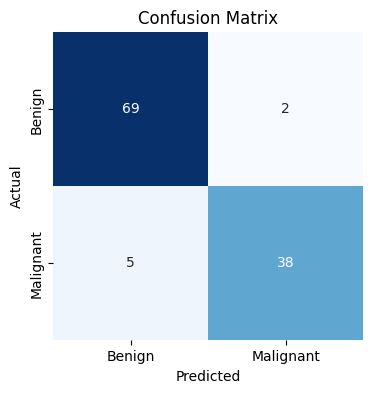

Accuracy: 0.9386
Precision: 0.9500
Recall: 0.8837
F1 Score: 0.9157


In [ ]:
# Let's perform cross validation to tune the optimal parameters for a Random Forest model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

# Define the parameter grid for Random Forest
param_grid = {
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

dt_clf = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=3)
# Fit on training data (5 folds)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

print("Best Model: ", best_model)


# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Predict the probability of each class
y_prob = best_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
